**Q1. What is supervised, unsupervised, and reinforcement learning?**

### 🔹 Supervised Learning
- Model learns from **labeled data** (inputs + outputs).  
- Goal: predict outcomes for new data.  
- Examples: regression, classification.  
- Real-world: spam detection, house price prediction.

### 🔹 Unsupervised Learning
- Model learns from **unlabeled data** (no outputs).  
- Goal: find structure/patterns.  
- Examples: clustering, dimensionality reduction.  
- Real-world: customer segmentation, topic modeling.

### 🔹 Reinforcement Learning (RL)
- Agent interacts with environment, learns via **rewards & penalties**.  
- Goal: maximize long-term reward.  
- Examples: Q-learning, policy gradient.  
- Real-world: game playing (AlphaGo), robotics.

---

✅ **Key takeaway:**  
- **Supervised** = learn from labels.  
- **Unsupervised** = find hidden patterns.  
- **Reinforcement** = learn by trial and error.  


=== Supervised Learning Example ===
Training data X: [1 2 3 4 5]
Training labels y: [ 2  4  6  8 10]
Prediction for input [6]: 12.0

=== Unsupervised Learning Example ===
Cluster centers:
 [[0.21 0.63]
 [0.64 0.35]]
Cluster labels for points: [0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1]


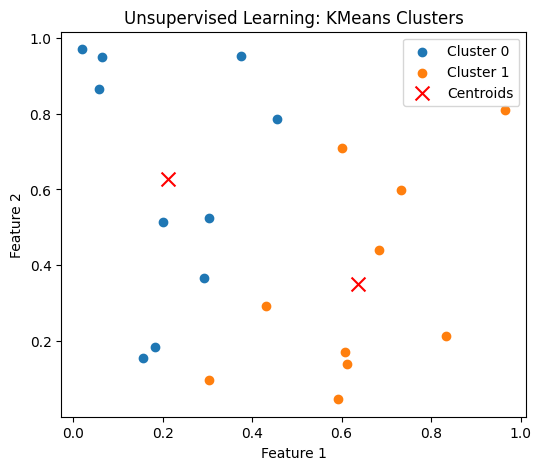

In [3]:
# Example: Simple supervised vs unsupervised demo
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# -------------------
# Supervised Learning
# -------------------
print("=== Supervised Learning Example ===")
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([2,4,6,8,10])  # labeled outputs

model = LinearRegression().fit(X,y)
prediction = model.predict([[6]])[0]

print("Training data X:", X.ravel())
print("Training labels y:", y)
print("Prediction for input [6]:", round(prediction, 2))

# ---------------------
# Unsupervised Learning
# ---------------------
print("\n=== Unsupervised Learning Example ===")
X_unsup = np.random.rand(20,2)  # random 2D points

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_unsup)
labels = kmeans.labels_

print("Cluster centers:\n", np.round(kmeans.cluster_centers_, 2))
print("Cluster labels for points:", labels)

# Plot clusters with legend
plt.figure(figsize=(6,5))
for cluster_id in np.unique(labels):
    plt.scatter(X_unsup[labels==cluster_id, 0], 
                X_unsup[labels==cluster_id, 1], 
                label=f"Cluster {cluster_id}")
    
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='red', marker='x', s=100, label="Centroids")

plt.title("Unsupervised Learning: KMeans Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Q2. Explain overfitting and underfitting. How can we prevent them?**

- **Underfitting**: model too simple → high bias, misses patterns.  
- **Overfitting**: model too complex → high variance, memorizes noise.  

### 🔹 Prevention techniques:
- Cross-validation  
- Regularization (L1/L2)  
- Dropout (neural nets)  
- Early stopping  
- More training data  


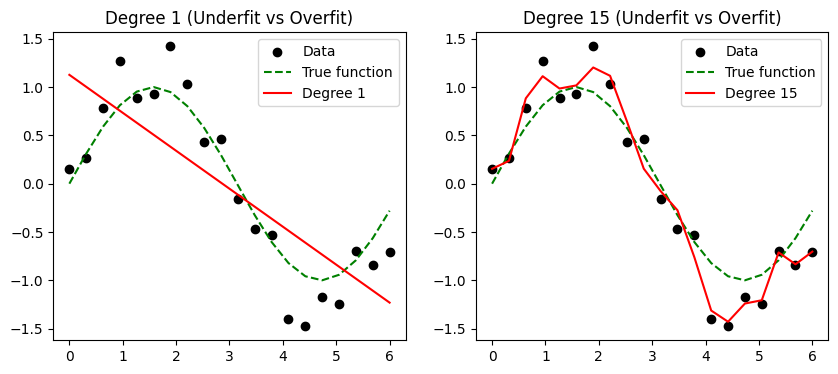

In [4]:
# Example: Overfitting vs Underfitting with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.linspace(0, 6, 20)
y_true = np.sin(X)
y = y_true + np.random.normal(scale=0.3, size=len(X))
X = X.reshape(-1,1)

degrees = [1, 15]
plt.figure(figsize=(10,4))

for i, deg in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.subplot(1,2,i)
    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X, y_true, "g--", label="True function")
    plt.plot(X, y_pred, "r", label=f"Degree {deg}")
    plt.legend()
    plt.title(f"Degree {deg} (Underfit vs Overfit)")

plt.show()


**Q3. What are the main types of regression algorithms? (with L1 vs L2)**

### 🔹 Linear Regression
- **Model:** $$\hat{y} = w^\top x + b$$
- **Loss (MSE):** $$\min_{w,b} \; \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$
- Captures a **straight-line** relationship between features and target.

### 🔹 Polynomial Regression
- Map inputs to powers: $$\phi(x) = [1, x, x^2, \dots, x^d]$$ and run linear regression on \(\phi(x)\).  
- Fits **curved** relationships while staying linear in parameters.

### 🔹 Regularized Regression (to control overfitting)
- **Ridge (L2):** adds penalty on squared weights  
  $$\text{Loss} = \text{MSE} + \lambda \sum_j w_j^2$$
  - Shrinks all coefficients smoothly toward zero (**rarely exactly zero**).  
  - Helps when features are correlated; reduces variance.
- **Lasso (L1):** adds penalty on absolute weights  
  $$\text{Loss} = \text{MSE} + \lambda \sum_j |w_j|$$
  - Can push some coefficients to **exactly zero** → **feature selection**.  
  - Produces sparse models; useful when many features may be irrelevant.

---

### 🔹 Why Polynomial, Ridge, and Lasso may look similar
If the polynomial degree matches the true data-generating process (e.g., **degree = 2** for a quadratic), then:
- Plain Polynomial, Ridge, and Lasso can all fit well, so the curves look similar.  
- Differences become clear when the model is **over-parameterized** (e.g., **degree = 10**):  
  - **Ridge** smooths the wiggly curve (shrinks coefficients).  
  - **Lasso** can drop entire powers (sets coefficients to zero), yielding a simpler curve.

---

### 🔹 What you’ll see in code
- Fit and evaluate **Linear**, **Polynomial (deg=2 & deg=10)**, **Ridge**, **Lasso**.  
- Print **MAE**, **R²**, and **coefficients** (so you can visually compare L1 vs L2 behaviour).  
- Plot separate charts (one per model) without forcing colors.

Linear Regression (deg=1) -> MAE: 1.242 | R^2: 0.369
  Intercept: 1.5572
  Coefficients: [-1.0337]
Polynomial Regression (deg=2) -> MAE: 0.442 | R^2: 0.914
  Intercept: -0.0103
  Coefficients: [('1', 0.0), ('x', -0.9699), ('x^2', 0.5104)]
Ridge Regression (deg=2, L2) -> MAE: 0.441 | R^2: 0.914
  Intercept: -0.0082
  Coefficients: [('1', 0.0), ('x', -0.9665), ('x^2', 0.5099)]
Lasso Regression (deg=2, L1) -> MAE: 0.441 | R^2: 0.915
  Intercept: -0.0026
  Coefficients: [('1', 0.0), ('x', -0.9637), ('x^2', 0.5081)]


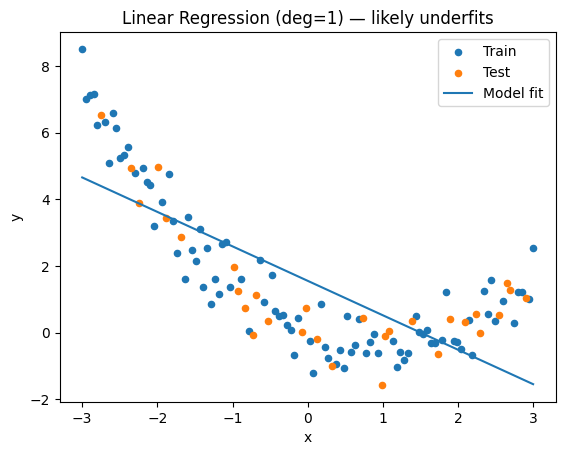

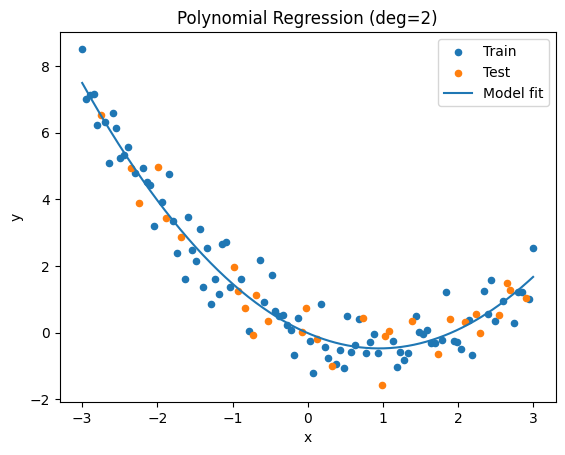

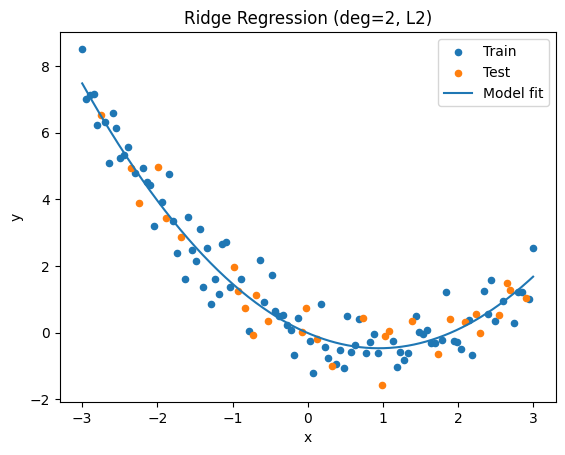

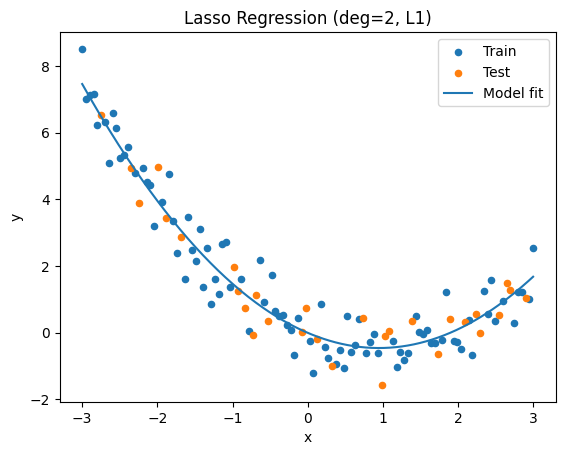

Polynomial Regression (deg=10) -> MAE: 0.472 | R^2: 0.897
  Intercept: -0.13
  Coefficients: [('1', 0.0), ('x', -1.3849), ('x^2', 1.3789), ('x^3', 0.5602), ('x^4', -0.836), ('x^5', -0.2057), ('x^6', 0.2801), ('x^7', 0.0287), ('x^8', -0.0382), ('x^9', -0.0014), ('x^10', 0.0018)]
Ridge Regression (deg=10, L2) -> MAE: 0.455 | R^2: 0.908
  Intercept: 0.0256
  Coefficients: [('1', 0.0), ('x', -1.0043), ('x^2', 0.6164), ('x^3', 0.1251), ('x^4', -0.2224), ('x^5', -0.0519), ('x^6', 0.1005), ('x^7', 0.0074), ('x^8', -0.0163), ('x^9', -0.0004), ('x^10', 0.0009)]
Lasso Regression (deg=10, L1) -> MAE: 0.454 | R^2: 0.910
  Intercept: 0.0581
  Coefficients: [('1', 0.0), ('x', -0.9947), ('x^2', 0.3845), ('x^3', 0.0731), ('x^4', -0.0), ('x^5', -0.0248), ('x^6', 0.0278), ('x^7', 0.0028), ('x^8', -0.0067), ('x^9', -0.0001), ('x^10', 0.0004)]


/Users/c.balkigemirter/PycharmProjects/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+01, tolerance: 5.068e-02
  model = cd_fast.enet_coordinate_descent(


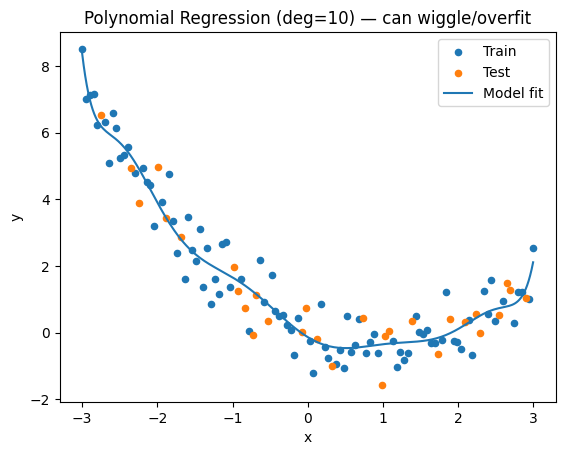

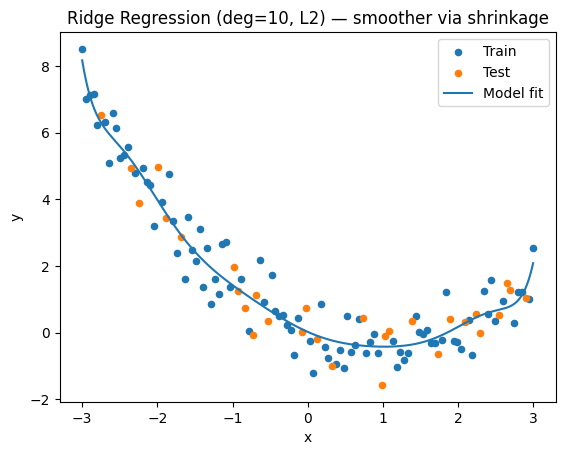

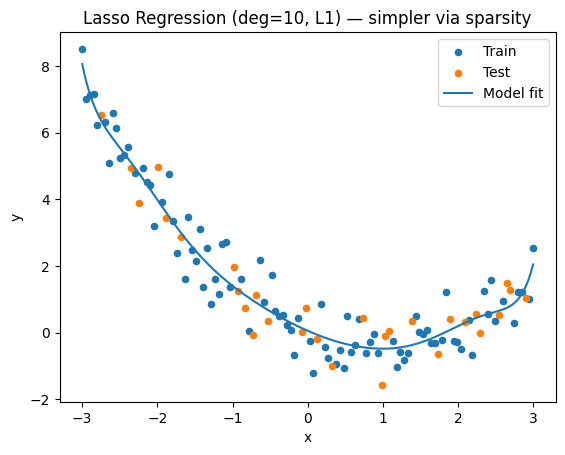


Notes:
- Ridge (L2) shrinks coefficients smoothly — curves get smoother, fewer extreme oscillations.
- Lasso (L1) can set some polynomial coefficients exactly to zero — the fit becomes simpler (sparser).
- With deg=2 (true model), all three look similar. With deg=10, differences are clear.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Reproducibility
np.random.seed(7)

# ----- Synthetic nonlinear data -----
# True function: y = 0.5 x^2 - x + noise
X = np.linspace(-3, 3, 120).reshape(-1, 1)
y_true = 0.5 * X[:, 0]**2 - 1.0 * X[:, 0]
y = y_true + np.random.normal(scale=0.6, size=len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Helper to extract readable coefficient names for PolynomialFeatures (1D input)
def poly_feature_names(degree):
    # For 1D X, features are: [1, x, x^2, ..., x^degree]
    return ["1"] + [f"x^{p}" if p>1 else "x" for p in range(1, degree+1)]

def evaluate_and_report(model, name, degree=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MAE: {mae:.3f} | R^2: {r2:.3f}")
    # Print coefficients when available
    if hasattr(model, "coef_"):
        # LinearRegression directly on X (no polynomial expansion)
        coefs = np.atleast_1d(model.coef_).ravel()
        intercept = getattr(model, "intercept_", None)
        print("  Intercept:", round(float(intercept), 4))
        print("  Coefficients:", [round(float(c), 4) for c in coefs])
    else:
        # Pipeline: last step has the regressor
        reg = model.named_steps[list(model.named_steps.keys())[-1]]
        intercept = getattr(reg, "intercept_", None)
        coefs = np.atleast_1d(getattr(reg, "coef_", np.array([]))).ravel()
        if degree is not None and coefs.size > 0:
            names = poly_feature_names(degree)
            # coefs correspond to features after PolynomialFeatures (excluding bias term handled via intercept)
            # For sklearn PolynomialFeatures with include_bias=True (default), LinearRegression will handle intercept separately.
            print("  Intercept:", round(float(intercept), 4))
            # Align lengths: reg.coef_ has length equal to transformed features excluding the bias column for LinearRegression
            # For 1D, reg.coef_ length should equal degree+1 if intercept is separate; we map them to names accordingly
            if len(names) == len(coefs):
                pairs = list(zip(names, [round(float(c), 4) for c in coefs]))
            else:
                # Fallback: just print coefficients
                pairs = [round(float(c), 4) for c in coefs]
            print("  Coefficients:", pairs)
        else:
            print("  Intercept:", round(float(intercept), 4))
            print("  Coefficients:", [round(float(c), 4) for c in coefs])
    return model

# ----- Models: degree=2 (matches ground truth) -----
lin = evaluate_and_report(LinearRegression(), "Linear Regression (deg=1)")

poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly2 = evaluate_and_report(poly2, "Polynomial Regression (deg=2)", degree=2)

ridge2 = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1.0, random_state=7))
ridge2 = evaluate_and_report(ridge2, "Ridge Regression (deg=2, L2)", degree=2)

lasso2 = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.02, max_iter=20000, random_state=7))
lasso2 = evaluate_and_report(lasso2, "Lasso Regression (deg=2, L1)", degree=2)

# Plotting helper: single chart per model (no explicit colors)
def plot_model(model, title):
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    plt.figure()
    plt.scatter(X_train, y_train, s=20, label="Train")
    plt.scatter(X_test, y_test, s=20, label="Test")
    plt.plot(X_plot, model.predict(X_plot), label="Model fit")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plot_model(lin, "Linear Regression (deg=1) — likely underfits")
plot_model(poly2, "Polynomial Regression (deg=2)")
plot_model(ridge2, "Ridge Regression (deg=2, L2)")
plot_model(lasso2, "Lasso Regression (deg=2, L1)")

# ----- Models: degree=10 (over-parameterized to expose differences) -----
poly10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
poly10 = evaluate_and_report(poly10, "Polynomial Regression (deg=10)", degree=10)

ridge10 = make_pipeline(PolynomialFeatures(10), Ridge(alpha=1.0, random_state=7))
ridge10 = evaluate_and_report(ridge10, "Ridge Regression (deg=10, L2)", degree=10)

lasso10 = make_pipeline(PolynomialFeatures(10), Lasso(alpha=0.005, max_iter=50000, random_state=7))
lasso10 = evaluate_and_report(lasso10, "Lasso Regression (deg=10, L1)", degree=10)

plot_model(poly10, "Polynomial Regression (deg=10) — can wiggle/overfit")
plot_model(ridge10, "Ridge Regression (deg=10, L2) — smoother via shrinkage")
plot_model(lasso10, "Lasso Regression (deg=10, L1) — simpler via sparsity")

print("\nNotes:")
print("- Ridge (L2) shrinks coefficients smoothly — curves get smoother, fewer extreme oscillations.")
print("- Lasso (L1) can set some polynomial coefficients exactly to zero — the fit becomes simpler (sparser).")
print("- With deg=2 (true model), all three look similar. With deg=10, differences are clear.")


**Q4. What are common classification algorithms (k-NN, Decision Trees, Naive Bayes, SVM)?**

Classification = predicting a **category/label** (discrete output) rather than a continuous value.

---

### 🔹 k-Nearest Neighbors (k-NN)
- **Idea:** Classify a test example (query point ★) by looking at its **k nearest neighbors** in the training set.  
- **Prediction:** The majority class among the circled neighbors determines the label.  
- **Behavior:** Small k → sensitive to noise; large k → smoother but may miss small clusters.  
- **Visualization:** Decision regions are shaped around training examples. Stars = test queries, red circles = neighbors.  
- **Pros:** Simple, intuitive.  
- **Cons:** Slow at inference with large datasets; sensitive to feature scaling.  

---

### 🔹 Decision Trees
- **Idea:** Recursively split the feature space on thresholds to maximize class purity.  
- **Interpretability:** Can be visualized as a **tree diagram**; each split = “if feature ≤ threshold then go left/right.”  
- **Decision regions:** Axis-aligned boundaries in 2D (step-like shapes).  
- **Extras:** Feature importances show which features the tree relied on most.  
- **Pros:** Easy to interpret, works with mixed feature types.  
- **Cons:** Can overfit without pruning or depth limits.  

---

### 🔹 Naive Bayes
- **Idea:** Based on Bayes’ theorem, with the assumption that features are **conditionally independent** given the class.  
- **Mathematics:**  
  \[
  \hat{c} = \arg\max_c \; P(c)\prod_j P(x_j \mid c)
  \]  
- **Contours:** Class-conditional likelihoods \(p(x|c)\) are Gaussian with diagonal covariance ⇒ axis-aligned ellipses.  
  - **σ (std. dev.) vs var (variance):**  
    - σ = spread in feature units,  
    - var = σ².  
  - Contours at 1σ, 2σ, 3σ show probability “clouds” around the mean.  
- **Pros:** Extremely fast; strong baseline for text classification.  
- **Cons:** Independence assumption often unrealistic.  

---

### 🔹 Support Vector Machine (SVM)
- **Idea (binary):** Find the hyperplane \(w^\top x + b = 0\) that **maximizes margin** between classes.  
  - Margins are at \(w^\top x + b = \pm 1\).  
  - **Support vectors** = training points lying on or inside the margins; they “support” and define the boundary.  
- **Multi-class:** Scikit-learn uses **one-vs-one** (3 binary SVMs for 3 classes). The combined decision regions vote across these separators.  
- **Pros:** Effective in high-dimensional spaces, robust with kernels (nonlinear boundaries).  
- **Cons:** Training can be slow on very large datasets; less interpretable than trees.  

---

### 🔹 Why they matter in ML?
- These algorithms are **core building blocks** of classification.  
- They illustrate key concepts: distance-based reasoning (k-NN), rule-based partitions (Decision Trees), probabilistic models (Naive Bayes), and margin maximization (SVM).  
- Widely used in practice: text classification, image recognition, bioinformatics, fraud detection, and more.  

---

### 🔹 Example Setup
We use the famous **Iris dataset** (3 flower types).  
We train and compare: **k-NN, Decision Tree, Naive Bayes, SVM**.  
We report **accuracy** and plot decision boundaries:  
- k-NN shows **query/test stars + neighbors**.  
- Decision Tree shows **axis-aligned boundaries + tree diagram + feature importances**.  
- Naive Bayes shows **Gaussian likelihood ellipses (1σ, 2σ, 3σ)**.  
- SVM shows **hyperplanes, margins, and support vectors**.


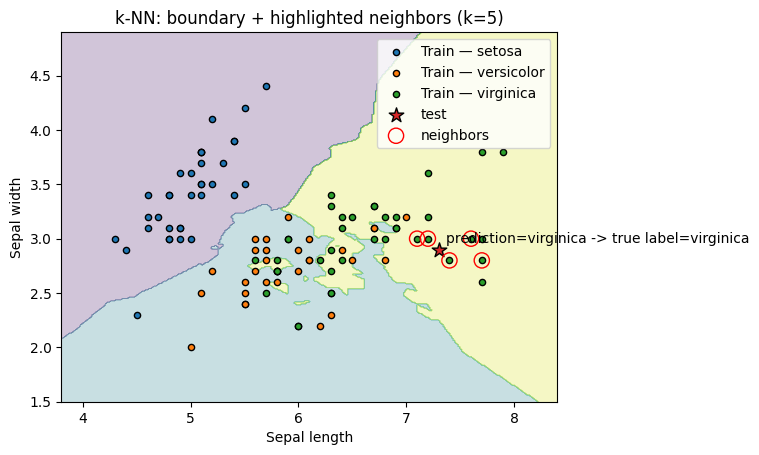

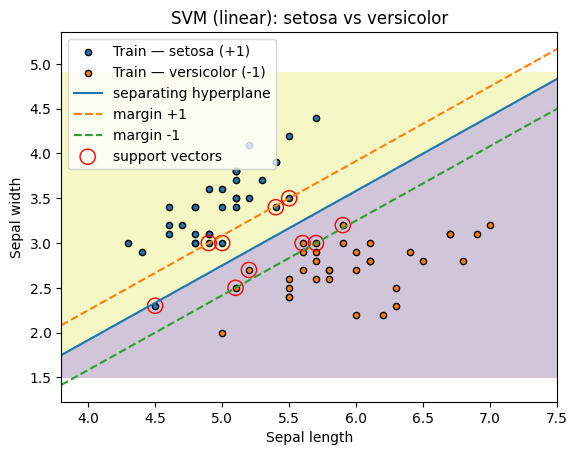

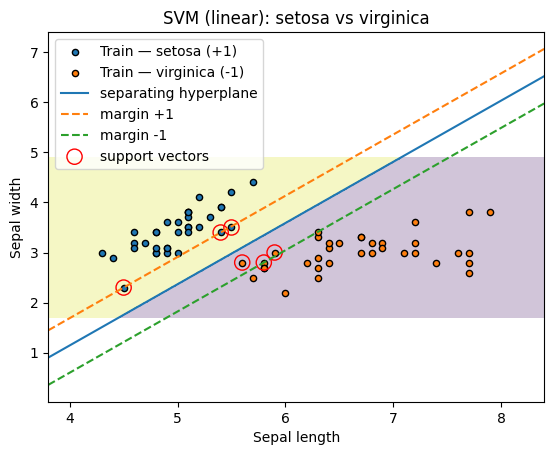

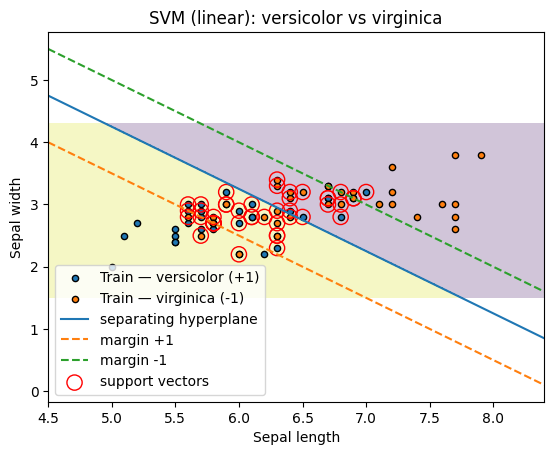

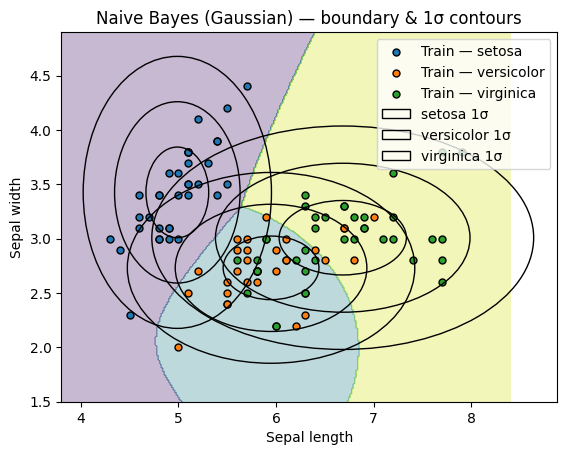

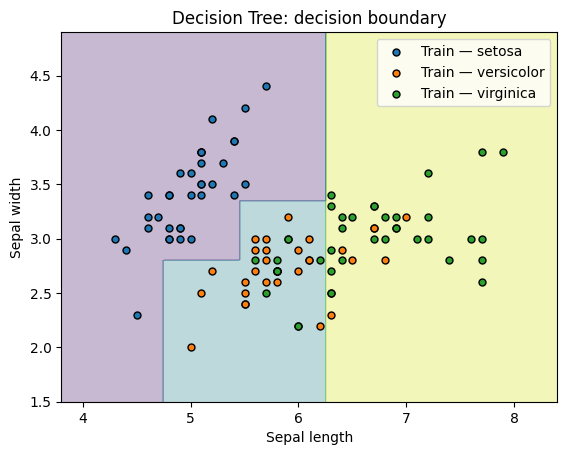

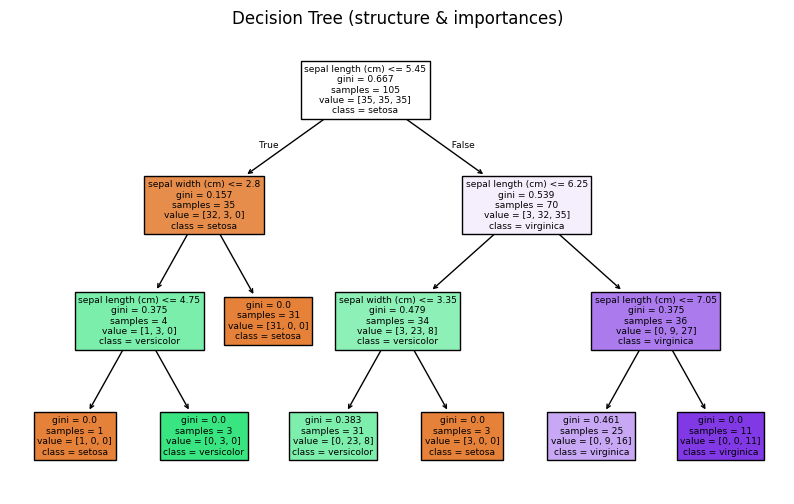

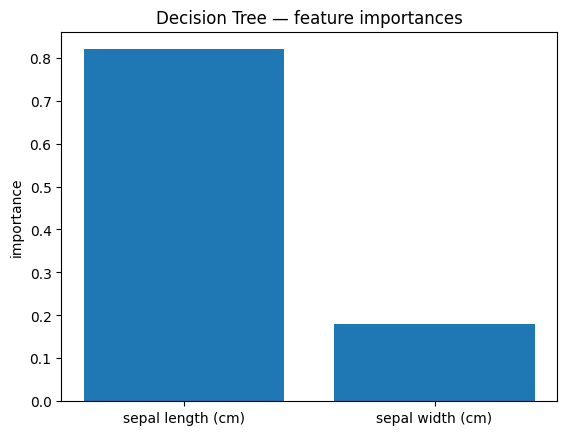

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.tree import plot_tree

# ---------- helpers ----------
def _dedup_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    uniq = dict(zip(labels, handles))
    ax.legend(uniq.values(), uniq.keys(), loc="best")

# ---------- Decision Tree: boundary + tree + importances ----------
def plot_dt_boundary(dt, X_train, y_train, class_names, title="Decision Tree: decision boundary"):
    dt.fit(X_train, y_train)

    x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
    y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = dt.predict(grid).reshape(xx.shape)

    fig = plt.figure()
    ax = plt.gca()
    cs = ax.contourf(xx, yy, Z, alpha=0.30)
    for cls in np.unique(y_train):
        idx = y_train == cls
        ax.scatter(X_train[idx,0], X_train[idx,1], s=25, edgecolor="k",
                   label=f"Train — {class_names[cls]}")
    ax.set_title(title)
    ax.set_xlabel("Sepal length"); ax.set_ylabel("Sepal width")
    _dedup_legend(ax)
    plt.show()

def plot_dt_details(dt, iris, title="Decision Tree (structure & importances)"):
    plt.figure(figsize=(10,6))
    plot_tree(dt,
              feature_names=iris.feature_names[:2],
              class_names=iris.target_names,
              filled=True)
    plt.title(title)
    plt.show()

    importances = dt.feature_importances_
    plt.figure()
    plt.bar(iris.feature_names[:2], importances)
    plt.title("Decision Tree — feature importances")
    plt.ylabel("importance")
    plt.show()

# ---------- k-NN: boundary + highlighted neighbors for multiple queries ----------
def plot_knn_neighbors(knn, X_train, y_train, scaler, X_test, y_test,
                       class_names, k_show=5, n_points=1,
                       title="k-NN: boundary + highlighted neighbors"):
    knn.fit(scaler.transform(X_train), y_train)

    # choose a few queries spread across test set
    idxs = np.linspace(0, len(X_test)-1, n_points, dtype=int)
    Xq = X_test[idxs]
    yq = y_test[idxs]

    # grid + boundary
    x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
    y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(scaler.transform(grid)).reshape(xx.shape)

    fig = plt.figure()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.25)

    # training points by class
    for cls in np.unique(y_train):
        idx = y_train == cls
        ax.scatter(X_train[idx,0], X_train[idx,1], s=20, edgecolor="k",
                   label=f"Train — {class_names[cls]}")

    # annotate queries + neighbors
    shown_query = False
    shown_neighbors = False
    for q, true_c in zip(Xq, yq):
        # star query
        ax.scatter(q[0], q[1], s=120, marker="*", edgecolor="k",
                   label=None if shown_query else "test")
        shown_query = True

        # nearest neighbors (indices into training set)
        dists, nbrs = knn.kneighbors(scaler.transform(q.reshape(1,-1)),
                                     n_neighbors=k_show)
        nbr_idx = nbrs[0]
        ax.scatter(X_train[nbr_idx,0], X_train[nbr_idx,1],
                   s=120, facecolors="none", edgecolor="red",
                   label=None if shown_neighbors else "neighbors")
        shown_neighbors = True

        # predicted class
        pred = knn.predict(scaler.transform(q.reshape(1,-1)))[0]
        ax.annotate(f"prediction={class_names[pred]} -> true label={class_names[true_c]}",
                    xy=(q[0], q[1]), xytext=(5, 5), textcoords="offset points")

    ax.set_title(f"{title} (k={knn.n_neighbors})")
    ax.set_xlabel("Sepal length"); ax.set_ylabel("Sepal width")
    _dedup_legend(ax)
    plt.show()

# ---------- SVM (linear): boundary + hyperplane/margins + support vectors ----------
from sklearn.svm import SVC

def plot_svm_linear_binary(class_a, class_b, X_train, y_train, scaler, class_names,
                           C=1.0, title_prefix="SVM (linear)"):
    # 1) take only two classes
    mask = np.isin(y_train, [class_a, class_b])
    X2 = X_train[mask]
    y2 = y_train[mask].copy()
    y2 = np.where(y2 == class_a, 1, -1)  # +1 vs -1 for canonical margins

    # 2) fit binary linear SVC on scaled features
    svc = SVC(kernel="linear", C=C)
    X2s = scaler.transform(X2)
    svc.fit(X2s, y2)

    w = svc.coef_[0]
    b = svc.intercept_[0]

    # 3) grid in original space, decision on scaled space
    x_min, x_max = X2[:,0].min()-0.5, X2[:,0].max()+0.5
    y_min, y_max = X2[:,1].min()-0.5, X2[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_raw = np.c_[xx.ravel(), yy.ravel()]
    Z = svc.predict(scaler.transform(grid_raw)).reshape(xx.shape)

    fig = plt.figure()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.25)

    # training points for the two classes
    for cls, label in [(class_a, f"Train — {class_names[class_a]} (+1)"),
                       (class_b, f"Train — {class_names[class_b]} (-1)")]:
        m = (y_train == cls) & mask
        ax.scatter(X_train[m,0], X_train[m,1], s=20, edgecolor="k", label=label)

    # helper: line y(x) for decision level ℓ in original space
    xs_line = np.linspace(x_min, x_max, 200)
    def y_from_level(x0, level):
        x0s = (x0 - scaler.mean_[0]) / scaler.scale_[0]
        y_s = (level - (w[0]*x0s + b)) / w[1]
        return y_s*scaler.scale_[1] + scaler.mean_[1]

    y_sep = [y_from_level(x, 0.0) for x in xs_line]   # decision boundary
    y_p1  = [y_from_level(x, +1.0) for x in xs_line]  # +1 margin
    y_m1  = [y_from_level(x, -1.0) for x in xs_line]  # -1 margin

    ax.plot(xs_line, y_sep, label="separating hyperplane")
    ax.plot(xs_line, y_p1, "--", label="margin +1")
    ax.plot(xs_line, y_m1, "--", label="margin -1")

    # support vectors (transform back to original space)
    sv_scaled = svc.support_vectors_
    sv_raw = sv_scaled * scaler.scale_ + scaler.mean_
    ax.scatter(sv_raw[:,0], sv_raw[:,1], s=120, facecolors="none",
               edgecolor="red", label="support vectors")

    ax.set_title(f"{title_prefix}: {class_names[class_a]} vs {class_names[class_b]}")
    ax.set_xlabel("Sepal length"); ax.set_ylabel("Sepal width")

    # dedup legend
    handles, labels = ax.get_legend_handles_labels()
    uniq = dict(zip(labels, handles))
    ax.legend(uniq.values(), uniq.keys(), loc="best")
    plt.show()

# ---------- Naive Bayes (Gaussian): boundary + 1σ ellipses ----------
def plot_nb_contours(nb, X_train, y_train, class_names,
                     title="Naive Bayes (Gaussian) — boundary & 1σ contours"):
    nb.fit(X_train, y_train)

    means = nb.theta_
    vars_ = nb.var_ if hasattr(nb, "var_") else nb.sigma_

    x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
    y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = nb.predict(grid).reshape(xx.shape)

    fig = plt.figure()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.30)

    for cls in np.unique(y_train):
        m = y_train == cls
        ax.scatter(X_train[m,0], X_train[m,1], s=25, edgecolor="k",
                   label=f"Train — {class_names[cls]}")

    # axis-aligned 1σ ellipses per class
    levels = [1, 2, 3]
    for cls in range(means.shape[0]):
        mx, my = means[cls]
        sx, sy = np.sqrt(vars_[cls])
        for L in levels:
            e = Ellipse((mx, my), width=2*L*sx, height=2*L*sy, fill=False,
                    label=f"{class_names[cls]} {L}σ" if L==1 else None)
            plt.gca().add_patch(e)

    ax.set_title(title)
    ax.set_xlabel("Sepal length"); ax.set_ylabel("Sepal width")
    _dedup_legend(ax)
    plt.show()

# k-NN neighbors (3 query stars by default)
plot_knn_neighbors(models["k-NN (k=5)"], X_train, y_train, scaler, X_test, y_test, class_names, k_show=5, n_points=1)

# SVM linear details
plot_svm_linear_binary(0, 1, X_train, y_train, scaler, class_names)
plot_svm_linear_binary(0, 2, X_train, y_train, scaler, class_names)
plot_svm_linear_binary(1, 2, X_train, y_train, scaler, class_names)

# Naive Bayes contours
plot_nb_contours(models["Naive Bayes"], X_train, y_train, class_names)

# Decision Tree: boundary, then structure + importances
plot_dt_boundary(models["Decision Tree"], X_train, y_train, class_names)
plot_dt_details(models["Decision Tree"], iris)

**Q5. What is cross-validation and why is it important?**

### 🔹 Definition
Cross-validation is a resampling method to **estimate model performance** more reliably than a single train/test split.

- **Goal:** Reduce variance in evaluation and detect overfitting.  
- **How:** Split the dataset into *k* folds (subsets). Train on *k-1* folds and validate on the remaining fold. Repeat until every fold has been used as validation once.  
- **Result:** Average performance across folds.

---

### 🔹 Main Types
1. **k-fold cross-validation**  
   - Data split into *k* equal folds.  
   - Example: *k=5* → 5 training/validation rounds.  

2. **Stratified k-fold**  
   - Ensures each fold keeps the same class proportions.  
   - Important for imbalanced datasets.  

3. **Leave-One-Out (LOO)**  
   - Extreme case: each fold contains exactly 1 example.  
   - Very thorough, but computationally expensive.  

---

### 🔹 Why it matters in ML
- Gives a **more stable estimate** of generalization error.  
- Helps tune hyperparameters (e.g., choose *k* in k-NN, or depth in Decision Trees).  
- Detects models that **overfit** to a particular split.  

---

### 🔹 Example in Python
We’ll run k-fold and stratified k-fold cross-validation on the **Iris dataset**.

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

# Data
iris = load_iris()
X, y = iris.data, iris.target

# Model
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

# 1) Simple k-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_kf = cross_val_score(dt, X, y, cv=kf)
print("KFold (5 splits):", scores_kf)
print("Mean accuracy:", np.mean(scores_kf).round(3))

# 2) Stratified k-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skf = cross_val_score(dt, X, y, cv=skf)
print("\nStratified KFold (5 splits):", scores_skf)
print("Mean accuracy:", np.mean(scores_skf).round(3))

KFold (5 splits): [1.         0.96666667 0.93333333 0.9        0.96666667]
Mean accuracy: 0.953

Stratified KFold (5 splits): [0.96666667 0.96666667 0.93333333 1.         0.93333333]
Mean accuracy: 0.96


**Q6. What are bias and variance in ML models?**

### 🔹 Bias
- Error from **simplifying assumptions** in the model.  
- High bias → model too simple → **underfitting**.  
- Example: fitting a straight line to a quadratic curve.

### 🔹 Variance
- Error from **sensitivity to training data fluctuations**.  
- High variance → model too complex → **overfitting**.  
- Example: fitting a 15-degree polynomial to a quadratic curve.

### 🔹 The Tradeoff
Total expected prediction error can be decomposed as:
\[
\text{Error}(x) = \text{Bias}^2(x) + \text{Variance}(x) + \text{Irreducible noise}
\]

- **Bias²:** How far the average prediction is from the true function.  
- **Variance:** How much predictions would vary if we trained on different data.  
- **Irreducible noise:** Randomness in data that no model can capture.  

---

### 🔹 Why it matters
- **High-bias models** (e.g., shallow linear models) → underfit, poor training and test accuracy.  
- **High-variance models** (e.g., deep trees, high-degree polynomials) → excellent training accuracy but poor generalization.  
- Goal: find the “sweet spot” where **bias and variance are balanced**.

---

### 🔹 Example in Python
We’ll train polynomial regressors of different degrees on noisy quadratic data and compare training vs test errors.

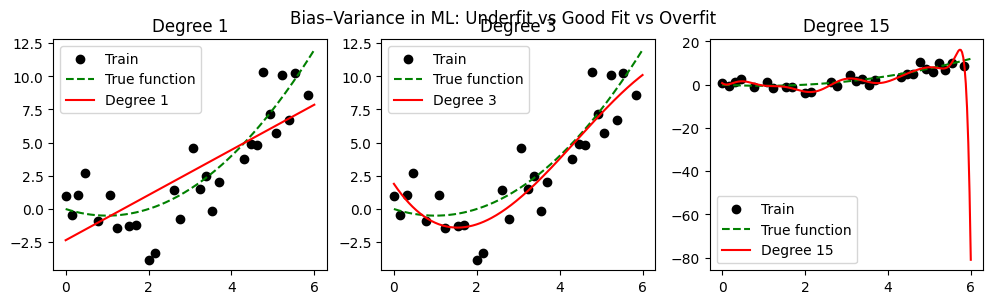

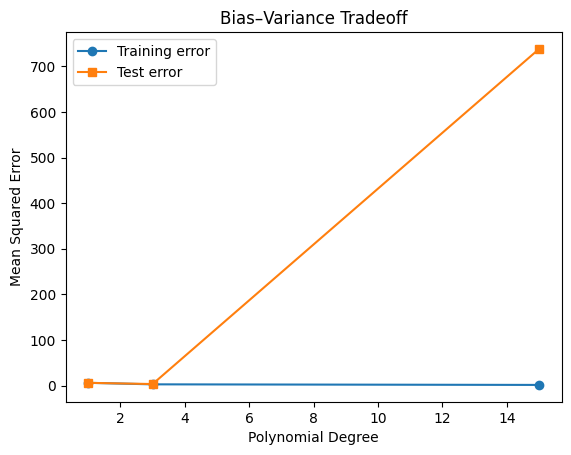

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Data
np.random.seed(42)
X = np.linspace(0, 6, 40).reshape(-1, 1)
y_true = 0.5 * X[:, 0]**2 - X[:, 0]
y = y_true + np.random.normal(scale=2.0, size=len(X))  # noisy quadratic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Degrees to test
degrees = [1, 3, 15]
train_errors, test_errors = [], []

plt.figure(figsize=(12, 3))
for i, d in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Plot fit
    X_plot = np.linspace(0, 6, 200).reshape(-1, 1)
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color="black", label="Train")
    plt.plot(X_plot, 0.5*X_plot[:,0]**2 - X_plot[:,0], "g--", label="True function")
    plt.plot(X_plot, model.predict(X_plot), "r", label=f"Degree {d}")
    plt.title(f"Degree {d}")
    plt.legend()

plt.suptitle("Bias–Variance in ML: Underfit vs Good Fit vs Overfit")
plt.show()

# Plot training vs test errors
plt.figure()
plt.plot(degrees, train_errors, "o-", label="Training error")
plt.plot(degrees, test_errors, "s-", label="Test error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff")
plt.legend()
plt.show()

**Q7. What is the confusion matrix and what are key classification metrics?**

### 🔹 Confusion Matrix
A **confusion matrix** summarizes classification performance by counting **actual vs predicted** outcomes.

For binary classification:

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

- **TP:** Correctly predicted positives  
- **TN:** Correctly predicted negatives  
- **FP:** Predicted positive but actually negative (“false alarm”)  
- **FN:** Predicted negative but actually positive (“missed”)  

For multiclass, the matrix extends into an $n \times n$ table.

---

### 🔹 Key Metrics

- **Accuracy**  
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$  
  Overall proportion correct. Misleading if classes are imbalanced.

- **Precision (Positive Predictive Value)**  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$  
  Of the predicted positives, how many are actually positive?

- **Recall (Sensitivity, True Positive Rate)**  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$  
  Of all actual positives, how many did we catch?

- **F1 Score**  
  $$
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$  
  Harmonic mean of precision and recall. Useful when classes are imbalanced.

---

### 🔹 Real-Life Scenarios
- **Precision-critical (avoid false positives):**
  - Email spam filters → don’t block important emails.  
  - Credit card fraud alerts → don’t annoy customers with false alarms.  
  - Medical treatments → avoid giving unnecessary drugs.  

- **Recall-critical (avoid false negatives):**
  - Cancer screening → don’t miss real cases.  
  - Intrusion detection → don’t miss attacks.  
  - Search engines → better to return too many results than miss relevant ones.  

---

### 🔹 Easy Memory Trick
- **Precision** answers: *“When I predict positive, how precise am I?”*  
  → TP / (TP + FP)  
- **Recall** answers: *“Do I recall all the true positives?”*  
  → TP / (TP + FN)  

👉 Precision = **correct among predicted positives**.  
👉 Recall = **correct among actual positives**.

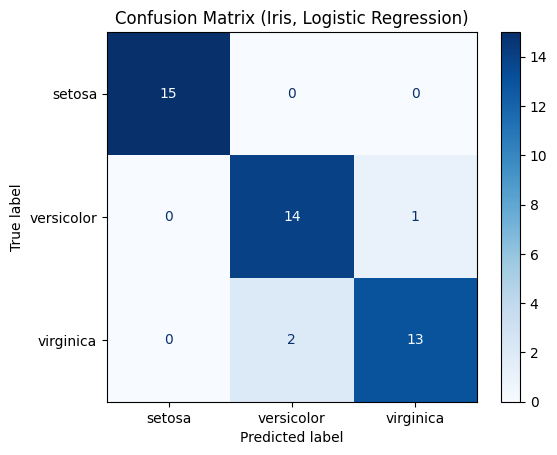

Accuracy: 0.933
Precision (macro): 0.935
Recall (macro): 0.933
F1 (macro): 0.933


In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)

# Model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Iris, Logistic Regression)")
plt.show()

# Metrics (macro-average for multiclass)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision (macro):", round(precision_score(y_test, y_pred, average='macro'), 3))
print("Recall (macro):", round(recall_score(y_test, y_pred, average='macro'), 3))
print("F1 (macro):", round(f1_score(y_test, y_pred, average='macro'), 3))

**Q8. Placeholder for ROC and AUC (to be expanded).**